<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.7/546.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2024-11-08 21:22:56
-------------------
qualified stocks: 87
with latest results: 83
still star stocks: 41
-------------------
Initial Investment:  98.12 L
CY Investment:  1.11 C
Reserve:  400.00
Current:  1.18 C
-------------------
Today PnL: -1.75 L (-1.46%)
Current PnL: -1.93 L (-1.74%)
CY Booked + Current PnL: 6.46 L (5.81%)
-------------------
Total profit:  8.32 L
Total loss:  -10.26 L
-------------------
Total Booked + Current PnL: 19.57 L (19.94%)
Total Booked PnL: 21.50 L (21.91%)
Curr Year Booked PnL: 8.39 L (7.11%)
Prev Year Booked PnL: 13.11 L (13.36%)
Est FTT:  1.89 C
Est FTT PnL: 70.58 L (59.84%)
-------------------
Est LTT:  2.37 C
Est LTT PnL: 1.19 C (101.16%)
Deployed:  98.12 L
Current:  1.18 C
CAGR/XIRR %: 17.91%


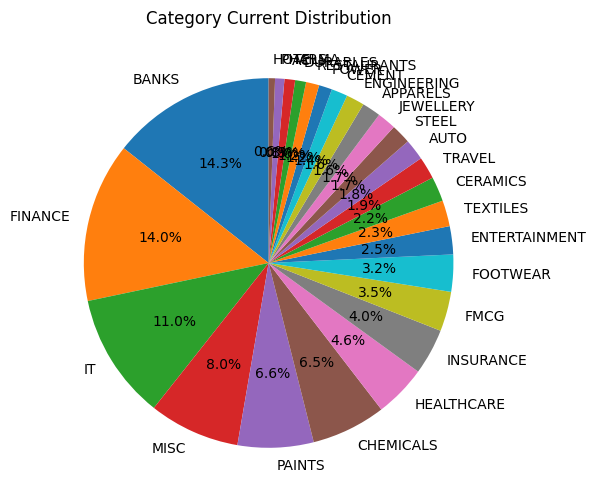

In [ ]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2()
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [ ]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
31,HCLTECH,1349.00,1837.50,2006.00,46.36,86.21,137812.0,36637.0,12637.0,0.30,36.21,9.17,48.70,86.0,2.90,1.17,51.60,X40,BTT,IT
86,WIPRO,401.00,569.00,611.00,34.01,97.70,239549.0,70728.0,17679.0,0.99,41.90,7.38,52.37,29.0,4.00,2.03,50.33,XR,NTT,IT
54,PAGEIND,38829.08,48002.90,52637.81,16.31,100.00,192012.0,36696.0,18548.0,6.52,23.63,9.66,35.56,9.0,1.98,1.63,45.98,X40,ATH,APPARELS
76,TCS,4073.44,4147.00,4998.00,5.35,66.67,99528.0,1765.0,20423.0,-0.09,1.81,20.52,22.70,10.0,0.09,0.84,26.56,X40,BTT,IT
49,LTIM,5051.49,5926.95,7262.39,19.93,33.33,94831.0,14007.0,21365.0,0.70,17.33,22.53,43.77,10.0,0.66,0.80,30.62,X200,ATH,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,CAMPUS,294.86,304.00,631.85,16.91,72.41,172976.0,5201.0,186555.0,-3.29,3.10,107.85,114.29,1.0,0.03,1.47,41.72,XSP,ATH,FOOTWEAR
62,SAIL,130.64,118.21,228.00,52.01,19.54,203558.0,-21404.0,189065.0,-4.17,-9.51,92.88,74.53,20.0,-0.11,1.73,37.77,XSP,BTT,STEEL
11,BANDHANBNK,223.20,177.68,400.00,-37.92,40.23,173593.0,-44473.0,217200.0,-2.05,-20.39,125.12,79.21,-19.0,-0.20,1.47,5.63,XSP,NTT,BANKS
74,TANLA,991.56,753.00,2007.31,-37.03,11.49,166413.0,-52722.0,277211.0,-0.01,-24.06,166.58,102.44,-29.0,-0.19,1.41,3.28,AR,ATH,IT


In [ ]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
76,TCS,4073.44,4147.00,4998.00,5.35,66.67,99528.0,1765.0,20423.0,-0.09,1.81,20.52,22.70,10.0,0.09,0.84,26.56,X40,BTT,IT
49,LTIM,5051.49,5926.95,7262.39,19.93,33.33,94831.0,14007.0,21365.0,0.70,17.33,22.53,43.77,10.0,0.66,0.80,30.62,X200,ATH,IT
47,LALPATHLAB,2519.90,3060.20,3689.00,-5.34,9.20,110167.0,19451.0,22639.0,-0.38,21.44,20.55,46.39,32.0,0.86,0.93,53.07,X40N,NTT,HEALTHCARE
15,BAYERCROP,4346.57,6596.40,8325.00,27.18,78.16,105542.0,35997.0,27663.0,-0.72,51.76,26.21,91.53,36.0,1.30,0.89,33.02,X40N,BTT,CHEMICALS
22,DABUR,523.35,531.50,735.00,-9.66,34.48,93012.0,1426.0,35614.0,-0.05,1.56,38.29,40.44,3.0,0.04,0.79,8.35,X40,BTT,FMCG
82,UNIONBANK,124.65,117.52,163.00,-9.22,85.06,94486.0,-5733.0,36566.0,-2.12,-5.72,38.70,30.77,-41.0,-0.16,0.80,16.05,XSP,NTT,BANKS
25,FINEORG,4771.46,5000.35,7168.71,-0.39,80.46,85006.0,3891.0,36859.0,-2.70,4.80,43.36,50.24,2.0,0.11,0.72,24.16,X40N,ATH,CHEMICALS
80,TTKPRESTIG,769.29,861.40,1149.24,24.51,70.11,112843.0,12066.0,37712.0,-1.69,11.97,33.42,49.39,17.0,0.32,0.96,29.61,X40N,ATH,DURABLES
7,ATULAUTO,656.09,597.55,844.00,NaN,45.98,94413.0,-9249.0,38936.0,-2.60,-8.92,41.24,28.64,-48.0,-0.24,0.80,25.61,XSP,NTT,AUTO
37,INDUSINDBK,1354.50,1053.80,1800.00,-40.64,1.15,60067.0,-17140.0,42533.0,-0.28,-22.20,70.81,32.89,-17.0,-0.40,0.51,1.51,XR,NTT,BANKS


In [ ]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,316.05,387.00,-9.12,21.84,156129.0,-2070.0,35051.0,-1.71,-1.31,22.45,20.85,94.0,-0.06,1.32,46.90,XSP,BTT,FINANCE
82,UNIONBANK,124.65,117.52,163.00,-9.22,85.06,94486.0,-5733.0,36566.0,-2.12,-5.72,38.70,30.77,-41.0,-0.16,0.80,16.05,XSP,NTT,BANKS
7,ATULAUTO,656.09,597.55,844.00,NaN,45.98,94413.0,-9249.0,38936.0,-2.60,-8.92,41.24,28.64,-48.0,-0.24,0.80,25.61,XSP,NTT,AUTO
56,QUESS,716.17,710.80,986.00,-14.94,41.38,124390.0,-940.0,48164.0,-0.82,-0.75,38.72,37.68,5.0,-0.02,1.05,61.24,XSP,NTT,MISC
16,BERGEPAINT,558.54,504.25,680.00,-33.41,12.64,159847.0,-17210.0,55707.0,-2.32,-9.72,34.85,21.75,-6.0,-0.31,1.36,11.36,XSP,NTT,PAINTS
68,SHALBY,271.92,223.78,327.00,NaN,8.05,123750.0,-26622.0,57086.0,-3.82,-17.70,46.13,20.26,-34.0,-0.47,1.05,4.12,XSP,NTT,HEALTHCARE
45,KANSAINER,299.63,271.15,340.00,-42.09,36.78,244035.0,-25632.0,61960.0,-3.06,-9.51,25.39,13.47,-12.0,-0.41,2.07,5.77,XSP,NTT,PAINTS
43,JPPOWER,18.73,17.99,26.20,-63.27,18.39,136238.0,-5604.0,62179.0,-3.90,-3.95,45.64,39.88,123.0,-0.09,1.16,40.00,XSP,NTT,POWER
52,MEDANTA,1022.60,1067.75,1486.00,-5.26,98.85,162298.0,6863.0,63572.0,-1.59,4.42,39.17,45.32,151.0,0.11,1.38,24.19,XSP,NTT,HEALTHCARE
24,EASEMYTRIP,39.93,32.18,52.80,NaN,68.39,99372.0,-23932.0,63678.0,-2.34,-19.41,64.08,32.23,-81.0,-0.38,0.84,11.39,XSP,NTT,TRAVEL


In [ ]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.62
1,20,35.16
2,30,49.20


In [ ]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XSP,35.47
X40,21.47
XR,19.09
X40N,15.87
AR,5.71
SR,1.57
X200,0.80


In [ ]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.33,-7.28,62.68
FINANCE,13.96,-3.20,56.78
IT,11.03,5.62,47.79
MISC,7.95,-2.71,56.81
PAINTS,6.64,-5.14,36.25
CHEMICALS,6.51,5.70,55.69
HEALTHCARE,4.56,8.86,38.93
INSURANCE,4.02,4.44,46.31
FMCG,3.47,-2.79,41.72
